In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision

sys.path.append('../')
import src.resnet50 as resnet50

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='../data/input', train=True,
                                        download=True, transform=transform)
train_dataloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=4)

testset = torchvision.datasets.CIFAR10(root='./data/input', train=False,
                                       download=True, transform=transform)
test_dataloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=4)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [13]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss()

model = resnet50.ResNet50(10).to(device)
optimizer = optim.Adam(model.parameters(), weight_decay=0.01)
epochs = 10

In [14]:
def train_step(x, t):
    model.train()
    preds = model(x)
    loss = criterion(preds, t)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    return loss, preds

In [15]:
def test_step(x, t):
    model.eval()
    preds = model(x)
    loss = criterion(preds, t)
    return loss, preds

In [29]:
n_batch_train = len(train_dataloader)
n_batch_test = len(test_dataloader)
loss_record = []
for epoch in range(epochs):
    
    train_loss = 0.
    test_loss = 0.
    test_acc = 0.
    print(f'Ep. {epoch:>4}:')
    for b_no, (x, t) in enumerate(train_dataloader):
        print(f'[train] batch no. {b_no:>5} / {n_batch_train:>5}', end='\r')
        x, t = x.to(device), t.to(device)
        loss, _ = train_step(x, t)
        train_loss += loss.item()
    train_loss /= n_batch_train
    for b_no, (x, t) in enumerate(test_dataloader):
        print(f'[test] batch no. {b_no:>5} / {n_batch_test:>5}', end='\r')
        x, t = x.to(device), t.to(device)
        loss, preds = test_step(x, t)
        test_loss += loss.item()
        test_acc += accuracy_score(t.tolist(), preds.argmax(dim=-1).tolist())
    test_loss /= n_batch_test
    test_acc /= n_batch_test
    
    loss_record.append([train_loss, test_loss])
    print(f'Valid Loss: {test_loss:.3f}, Valid Acc: {test_acc:.3f}')
loss_record = np.array(loss_record)

Valid Loss: 2.000, Valid Acc: 0.000
Valid Loss: 2.000, Valid Acc: 0.000
Valid Loss: 2.000, Valid Acc: 0.000
Valid Loss: 2.000, Valid Acc: 0.000
Valid Loss: 2.000, Valid Acc: 0.000
Valid Loss: 2.000, Valid Acc: 0.000
Valid Loss: 2.000, Valid Acc: 0.000
Valid Loss: 2.000, Valid Acc: 0.000
Valid Loss: 2.000, Valid Acc: 0.000
Valid Loss: 2.000, Valid Acc: 0.000


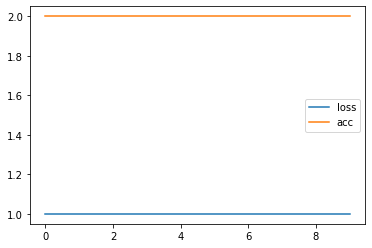

In [32]:
plt.plot(loss_record[:,0], label='loss')
plt.plot(loss_record[:,1], label='acc')
plt.legend()
plt.show()